In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

QUESTION 1

In [3]:
nserver = 10
mean_st = 8
mean_tbc = 1
customers = 10000
nsim = 10

In [4]:
def getHyperExp(p, lam1, lam2, size = 10000):
    res = np.zeros(size)
    u = np.random.uniform(0,1, size = size)
    res[u <= p] = stats.expon.rvs(scale = 1/lam1, size = np.sum(u <= p))
    res[u > p] = stats.expon.rvs(scale = 1/lam2, size = np.sum(u > p))
    return res

def getPar(k, beta = 1, size = 10000):
    us = np.random.uniform(0, 1, size)
    par = beta*(us**(-1/k))
    return par

In [5]:
def getCI(runs):
    CL = 0.95 # confidence level
    DF = nsim-1 # degrees of freedom
    z = np.abs(stats.t.ppf((1-CL)/2,DF))
    mean = np.mean(runs)
    std = np.std(runs, ddof = 1)
    u = mean + z*std/np.sqrt(nsim)
    l = mean - z*std/np.sqrt(nsim)
    return mean, u, l

In [10]:
def simulate_queue_q1(nserver, customers, mean_st, mean_tbc):
    server_time = np.zeros(nserver)
    busy = []
    time = 0
    blocked = 0
    for _ in range(customers):
        delta_arrival_time = stats.expon.rvs(scale = mean_tbc, size = 1)
        time += delta_arrival_time
        min_server = np.min(server_time)
        idx_min_server = np.argmin(server_time)
        if time < min_server:
            blocked +=1
            busy.append(nserver)
        else:
            server_time[idx_min_server] = time + stats.expon.rvs(scale = mean_st, size = 1)
            busy.append(np.sum(server_time > time))
            
    
    return blocked/customers, busy

(0.12332000000000001, 0.1285268723342641, 0.11811312766573592)


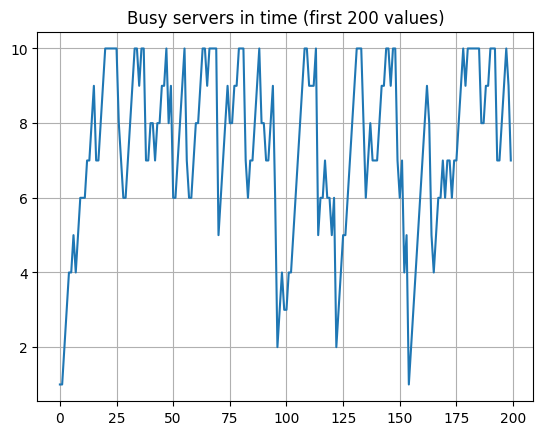

In [23]:
runs = []
for i in range(nsim):
    blocked, _ = simulate_queue_q1(nserver, customers, mean_st, mean_tbc)
    runs.append(blocked)
print(getCI(runs))

_, b = simulate_queue_q1(nserver, customers, mean_st, mean_tbc)
plt.plot(b[:200])
plt.title('Busy servers in time (first 200 values)')
plt.grid()
plt.show()

In [7]:
A = mean_st*(1/mean_tbc)
den = np.sum([A**i/np.math.factorial(i) for i in range(nserver+1)])
exact = A**nserver/np.math.factorial(nserver)/den
print('Exact Solution: {:.2f}% of customers will be blocked'.format(exact*100))

Exact Solution: 12.17% of customers will be blocked


QUESTION 2

In [10]:
def simulate_queue_q2(nserver, customers, mean_st, mean_tbc, type = 'Erl'):
    server_time = np.zeros(nserver)
    time = 0
    blocked = 0
    for _ in range(customers):
        if type == 'Erl':
            #erlang with some parameters such that the mean is equal to 1
            delta_arrival_time = stats.erlang.rvs(a = 3, scale = mean_tbc/3, size = 1)
        elif type == 'Hyp':
            delta_arrival_time = getHyperExp(0.8, 0.8333, 5, size = 1)[0]
        time += delta_arrival_time
        min_server = np.min(server_time)
        idx_min_server = np.argmin(server_time)
        if time < min_server:
            blocked +=1
        else:
            server_time[idx_min_server] = time + stats.expon.rvs(scale = mean_st, size = 1)[0]
    
    return blocked/customers

In [12]:
#ERLANG
runs = []
for i in range(nsim):
    blocked = simulate_queue_q2(nserver, customers, mean_st, mean_tbc, 'Erl')
    runs.append(blocked)

print(getCI(runs))

#HYPER EXPONENTIAL
runs = []
for i in range(nsim):
    blocked = simulate_queue_q2(nserver, customers, mean_st, mean_tbc, 'Hyp')
    runs.append(blocked)

print(getCI(runs))

(0.08352000000000001, 0.08639526414590964, 0.08064473585409038)
(0.139, 0.142921942379356, 0.13507805762064404)


QUESTION 3

In [10]:
def simulate_queue_q3(nserver, customers, mean_st, mean_tbc, type = 'Const'):
    server_time = np.zeros(nserver)
    time = 0
    blocked = 0
    for _ in range(customers):
        delta_arrival_time = stats.expon.rvs(scale = mean_tbc, size = 1)
        time += delta_arrival_time
        min_server = np.min(server_time)
        idx_min_server = np.argmin(server_time)
        if time < min_server:
            blocked +=1
        else:
            if(type == 'Const'):
                server_time[idx_min_server] = time + mean_st
            elif(type == 'Par1'):
                server_time[idx_min_server] = time + stats.pareto.rvs(b = 1.05, scale = mean_st*(1.05-1)/1.05, size = 1)
            elif(type == 'Par2'):
                server_time[idx_min_server] = time + stats.pareto.rvs(b = 2.05, scale = mean_st*(2.05-1)/2.05, size = 1)
            elif(type == 'Erl'):
                #erlang with some parameters such that the mean is equal to 8
                server_time[idx_min_server] = time + stats.erlang.rvs(a = 2, scale = mean_st/2, size = 1)

    return blocked/customers

In [12]:
np.mean(stats.pareto.rvs(b = 2.05, scale = mean_st*(2.05-1)/2.05, size = 100000))

8.026465532268913

In [11]:
#CONSTANT
runs = []
for i in range(nsim):
    blocked = simulate_queue_q3(nserver, customers, mean_st, mean_tbc, 'Const')
    runs.append(blocked)

print(getCI(runs))

#PARETO with k = 1.05
runs = []
for i in range(nsim):
    blocked = simulate_queue_q3(nserver, customers, mean_st, mean_tbc, 'Par1')
    runs.append(blocked)

print(getCI(runs))

#PARETO with k = 2.05
runs = []
for i in range(nsim):
    blocked = simulate_queue_q3(nserver, customers, mean_st, mean_tbc, 'Par2')
    runs.append(blocked)

print(getCI(runs))

#ERLANG
runs = []
for i in range(nsim):
    blocked = simulate_queue_q3(nserver, customers, mean_st, mean_tbc, 'Erl')
    runs.append(blocked)

print(getCI(runs))

(0.12353, 0.12729453432972074, 0.11976546567027928)
(0.0018599999999999999, 0.0036380932641118706, 8.190673588812938e-05)
(0.12547000000000003, 0.13627139183481968, 0.11466860816518037)
(0.12006000000000001, 0.12339274094865095, 0.11672725905134908)
